In [2]:
!pip install sentence-transformers

In [3]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("bert-base-nli-mean-tokens")
model


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [17]:
sentences = [
    "the sunrise is so pretty from the mountains",
    "I love watching the sunrise",
    "I love bananas just as much as I love mangoes",
    "this new person here is so intimidating, makes me want to impress her just to be able to sit next to her"
]

In [18]:
embeddings = model.encode(sentences)
embeddings

array([[-0.09592517,  0.0995347 , -0.01457631, ..., -0.01530769,
         0.01129896, -0.00189228],
       [-0.08670991,  0.10742047, -0.00799042, ...,  0.01962165,
         0.02437506, -0.00511681],
       [ 0.01761406,  0.09802917, -0.03392324, ...,  0.03354625,
        -0.03644286, -0.03248211],
       [ 0.01044668,  0.03020971,  0.0221624 , ...,  0.04590178,
        -0.01079827, -0.03373456]], dtype=float32)

In [19]:

embeddings.shape

(4, 768)

In [20]:
import numpy as np
from sentence_transformers.util import cos_sim

In [21]:
sim = np.zeros((len(sentences),len(sentences)))
for i in range(len(sentences)):
  sim[i:,i] = cos_sim(embeddings[i],embeddings[i:])
sim

array([[0.99999994, 0.        , 0.        , 0.        ],
       [0.77143228, 1.        , 0.        , 0.        ],
       [0.13191356, 0.21016484, 1.        , 0.        ],
       [0.09681003, 0.0289811 , 0.06456807, 1.        ]])

<Axes: >

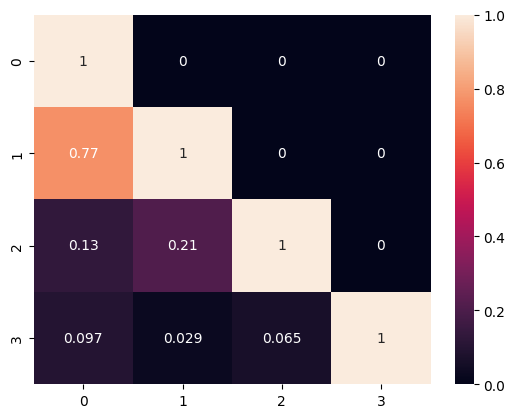

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(sim,annot=True)

In [23]:
model = SentenceTransformer("all-mpnet-base-v2")
model


SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [24]:
for i in range(len(sentences)):
  sim[i:,i] = cos_sim(embeddings[i],embeddings[i:])
sim

array([[0.99999994, 0.        , 0.        , 0.        ],
       [0.77143228, 1.        , 0.        , 0.        ],
       [0.13191356, 0.21016484, 1.        , 0.        ],
       [0.09681003, 0.0289811 , 0.06456807, 1.        ]])

<Axes: >

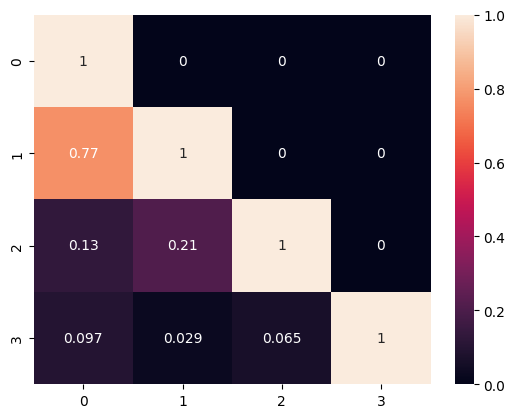

In [25]:
sns.heatmap(sim,annot=True)
